In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
data1=pd.read_csv('../Day_3_sales.csv')

In [116]:
data1.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [117]:
len(data1['Unnamed: 0'].unique())

640840

In [118]:
data1.shape

(640840, 10)

In [119]:
data1.set_index('Unnamed: 0', inplace=True)

In [120]:
data1.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
Unnamed: 0,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [121]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640840 entries, 425390 to 305711
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 48.9+ MB


In [122]:
data = data1
#display(data)

In [123]:
#data['day_of_week'].value_counts()

# Data cleaning and feature engineering

In [124]:
data.dtypes

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [125]:
#Changing data types
data['date']=pd.to_datetime(data['date'])

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640840 entries, 425390 to 305711
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   state_holiday        640840 non-null  object        
 7   school_holiday       640840 non-null  int64         
 8   sales                640840 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 48.9+ MB


In [127]:
#hot encoding 
data=pd.get_dummies(data, columns=['state_holiday'], drop_first=True)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640840 entries, 425390 to 305711
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   school_holiday       640840 non-null  int64         
 7   sales                640840 non-null  int64         
 8   state_holiday_a      640840 non-null  uint8         
 9   state_holiday_b      640840 non-null  uint8         
 10  state_holiday_c      640840 non-null  uint8         
dtypes: datetime64[ns](1), int64(7), uint8(3)
memory usage: 45.8 MB


In [129]:
#data.head()

In [130]:
#extracting the months in a new column from "date" column in order to take this information into acount in our predictions

data['month'] = pd.to_datetime(data['date']).dt.month

In [131]:
#data.head()

In [132]:
#drpping date column
data.drop('date', inplace=True, axis=1)

In [133]:
#data.head()

In [134]:
#hot encoding month column and day of week
data=pd.get_dummies(data, columns=['month'], drop_first=True)

In [135]:
#data.head()

In [136]:
data=pd.get_dummies(data, columns=['day_of_week'], drop_first=True)

In [137]:
data.head()

,store_ID,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,month_2,...,month_9,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
425390,366,517,1,0,0,4422,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
291687,394,694,1,0,0,8297,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
411278,807,970,1,1,0,9729,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
664714,802,473,1,1,0,6513,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
540835,726,1068,1,1,0,10882,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


<AxesSubplot:>

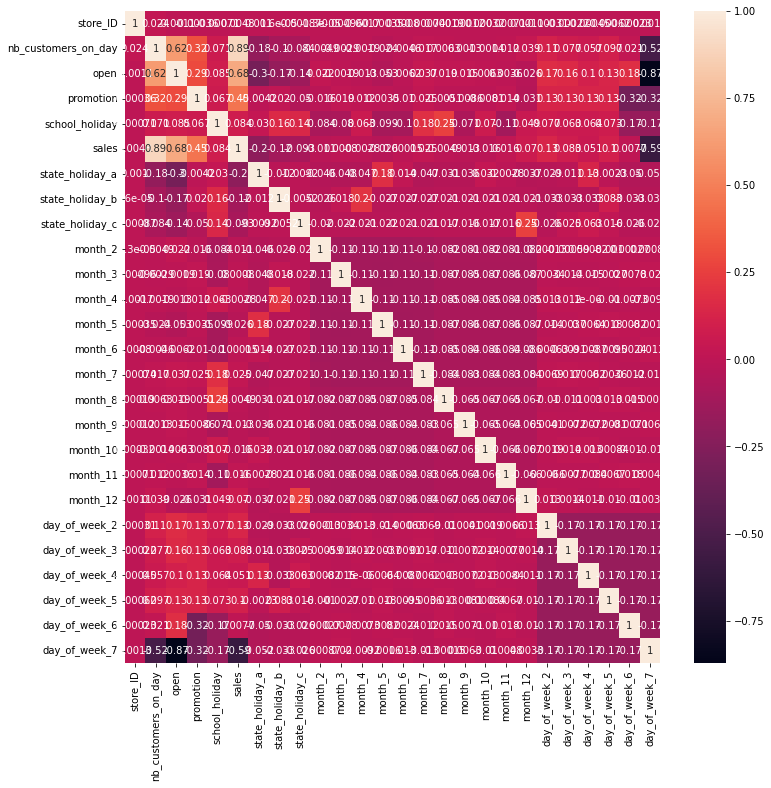

In [138]:
#analyzing correlations
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cbar=True)

# Creating a model

In [36]:
from sklearn.model_selection import train_test_split

X=data.drop(['sales'],axis=1)
y=data['sales']

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
#!pip install xgboost

In [42]:
#We chose the Extreme Gradient boosting porque David nos dijo en clase el día anterior que él empezaría probando este

import xgboost as xgb

In [44]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [45]:
#Checking the score and chekc if there is overfitting
print(xgb_reg.score(X_test,y_test))
print(xgb_reg.score(X_train, y_train))

0.9567792969197338
0.9590359536502169


doing the same as before but only taking into account for training the model, the data with the days where the stores are open (because when they are closed, the sales prediction will be always 0)

In [46]:
data_new = data.loc[data["open"]==1]

In [47]:
X2=data_new.drop(['sales'],axis=1)
y2=data_new['sales']

In [48]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [49]:
xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [50]:
#Checking the score and chekc if there is overfitting
print(xgb_reg2.score(X2_test,y2_test))
print(xgb_reg2.score(X2_train, y2_train))

0.927469331998915
0.9311136891718675


In [ ]:
#doing a pickle what is like a screenshot in order to generate a file for David and Gonçalo to run our model in their computers

#import pickle
#pickle.dump(xgb_reg2,open("model.p","wb"))

# Uploading the validation dataset for predict sales

In [94]:
validation=pd.read_csv('../Day_3_validation_for students.csv')
validation.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [95]:
#creating a function to save our data cleaning steps and feature engineering that could be pickled and to be sent to David and Gonçalo
#para que ellos puedan en su ordenador limpiar el "validation file" para probar nuestro modelo igual que hemos hecho nosotros de un solo paso

def cleaning(df):
    df['date']=pd.to_datetime(df['date'])
    df=pd.get_dummies(df, columns=['state_holiday'], drop_first=True)
    df['month'] = pd.to_datetime(df['date']).dt.month
    df.drop('date', inplace=True, axis=1)
    df=pd.get_dummies(df, columns=['month'], drop_first=True)
    df=pd.get_dummies(df, columns=['day_of_week'], drop_first=True)
    df.set_index("index", inplace=True)
    return df

In [96]:
#checking the function
validation_check =cleaning(validation)

In [97]:
#checking the function
validation_check.head()

,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,month_2,month_3,...,month_9,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
index,,,,,,,,,,,,,,,,,,,,,
272371,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
558468,27,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
76950,404,657,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
77556,683,862,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
456344,920,591,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [66]:
#pickling our data cleaning function

#import pickle
#pickle.dump(cleaning,open("function.p","wb"))

In [98]:
#checking the pickle
code1 = pd.read_pickle('function.p')
validation_final= code1(validation)
validation_final

,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,month_2,month_3,...,month_9,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
index,,,,,,,,,,,,,,,,,,,,,
272371,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
558468,27,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
76950,404,657,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
77556,683,862,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
456344,920,591,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59062,441,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
687449,377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
207393,15,648,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [100]:
#dividing our validation dataset because when "open" column is 0, the prediction will be 0, otherwise, we will use our model to predict

validation_open = validation_final.loc[validation_final["open"]==1]
validation_close = validation_final.loc[validation_final["open"]==0]

In [101]:
#using our pickled model to predict over "open" data:

model1 = pd.read_pickle("model.p")
results1 = model1.predict(validation_open)

In [102]:
results1

array([6586.816 , 7335.8257, 6081.9404, ..., 5724.793 , 6728.7827,
       8106.6846], dtype=float32)

In [103]:
#creating a new column in "open" data with the predictions
validation_open["Results"] = results1
validation_open

C:\Users\AMOHED~1\AppData\Local\Temp/ipykernel_22800/2261986728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_open["Results"] = results1


,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,month_2,month_3,...,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Results
index,,,,,,,,,,,,,,,,,,,,,
76950,404,657,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,6586.815918
77556,683,862,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7335.825684
456344,920,591,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,6081.940430
436466,758,569,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4193.020508
646251,563,321,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3923.196289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63935,55,583,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5719.974121
492885,231,378,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4112.359863
207393,15,648,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,5724.792969


In [104]:
#creating a new column in "close" data with the predictions that are 0 for all of them
validation_close["Results"] = 0
validation_close

C:\Users\AMOHED~1\AppData\Local\Temp/ipykernel_22800/925470650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_close["Results"] = 0


,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,month_2,month_3,...,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Results
index,,,,,,,,,,,,,,,,,,,,,
272371,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
558468,27,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
162710,756,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
44740,897,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
274598,1103,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587208,346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
138958,970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
620934,922,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [105]:
#concatenating "open" and "close" datasets

final_df= pd.concat([validation_close,validation_open])
final_df

,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,month_2,month_3,...,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Results
index,,,,,,,,,,,,,,,,,,,,,
272371,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
558468,27,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.000000
162710,756,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.000000
44740,897,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
274598,1103,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63935,55,583,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5719.974121
492885,231,378,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4112.359863
207393,15,648,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,5724.792969


In [110]:
#reseting the index in order to extract the rwo columns that we need
final_result = final_df.reset_index()
final_result

,index,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,month_2,...,month_10,month_11,month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Results
0,272371,415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
1,558468,27,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.000000
2,162710,756,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.000000
3,44740,897,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
4,274598,1103,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71200,63935,55,583,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5719.974121
71201,492885,231,378,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4112.359863
71202,207393,15,648,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,5724.792969
71203,233378,950,626,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6728.782715


In [111]:
#extracting the 2 columns that we have to send to David and Gonçalo: Index and sales predictions
final_result = final_result[["index","Results"]].copy()
final_result

,index,Results
0,272371,0.000000
1,558468,0.000000
2,162710,0.000000
3,44740,0.000000
4,274598,0.000000
...,...,...
71200,63935,5719.974121
71201,492885,4112.359863
71202,207393,5724.792969
71203,233378,6728.782715


In [112]:
#set index again to improve the format of the dataframe
final_result.set_index("index",inplace=True)

In [113]:
final_result.head()

,Results
index,
272371,0.0
558468,0.0
162710,0.0
44740,0.0
274598,0.0


In [241]:
#exporting the final result to csv to be sent to Gonçalo and David

#final_result.to_csv("Sales_prediction.csv")

In [ ]:
#we won the project: 
4th place: 87%
3rd and 2nd: 88%
1st (our group: Adolfo, Raghav and I): 95%